In [155]:
import panel as pn
pn.extension('plotly')
#import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns

In [16]:
import pandas as pd
#import keras
import pandas.plotting
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from pylab import mpl, plt
plt.style.use('seaborn')

In [5]:
import yfinance as yf

In [10]:
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si

### Funds for different market sectors VS inflation

In [ ]:
#pulling finance data for sector funds from yahoo finance

In [213]:
xle_monthly= get_data("XLE", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
xlf_monthly= get_data("XLF", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
xlv_monthly= get_data("XLV", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
rwr_monthly= get_data("RWR", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
xlk_monthly= get_data("XLK", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
xlu_monthly= get_data("XLU", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
xlp_monthly= get_data("XLP", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")

In [214]:
#combing clsoing prices of companies into dataframe

In [215]:
funds_close = pd.concat([xle_monthly['close'], xlf_monthly['close'], xlv_monthly['close'], rwr_monthly['close'], xlk_monthly['close'], xlu_monthly['close'], xlp_monthly['close']], axis = 1)
funds_close.columns = ['Energy','Finance','Health Care','Real Estate','Tech','Utilities','Consumer Staples']

In [216]:
funds_close.head()

,Energy,Finance,Health Care,Real Estate,Tech,Utilities,Consumer Staples
2000-01-01,27.312500,18.734768,30.109375,NaN,50.56250,27.640625,23.234375
2000-02-01,26.156250,16.729284,28.140625,NaN,55.87500,24.281250,20.515625
2000-03-01,29.312500,19.712124,30.671875,NaN,60.56250,26.734375,21.218750
2000-04-01,28.875000,19.902517,30.312500,NaN,55.00000,28.484375,22.343750
2000-05-01,32.265625,20.346771,29.500000,NaN,49.28125,28.421875,23.937500


In [314]:
inflation_df.head()

,Index,Inflation
Date,,
1913-01-01,9.8,NaN
1913-02-01,9.8,0.00
1913-03-01,9.8,0.00
1913-04-01,9.8,0.00
1913-05-01,9.7,-1.02


In [315]:
#combining fund prices and inflation statistics

In [316]:
funds_inflation_df = pd.concat([funds_close, inflation_df], axis=1, join ='inner')
funds_inflation_df.head()

,Energy,Finance,Health Care,Real Estate,Tech,Utilities,Consumer Staples,Index,Inflation
2000-01-01,27.312500,18.734768,30.109375,NaN,50.56250,27.640625,23.234375,168.8,0.30
2000-02-01,26.156250,16.729284,28.140625,NaN,55.87500,24.281250,20.515625,169.8,0.59
2000-03-01,29.312500,19.712124,30.671875,NaN,60.56250,26.734375,21.218750,171.2,0.82
2000-04-01,28.875000,19.902517,30.312500,NaN,55.00000,28.484375,22.343750,171.3,0.06
2000-05-01,32.265625,20.346771,29.500000,NaN,49.28125,28.421875,23.937500,171.5,0.12


In [317]:
funds_inflation_pct_change = funds_inflation_df.pct_change()

In [318]:
corr_df_funds =funds_inflation_df.corr()

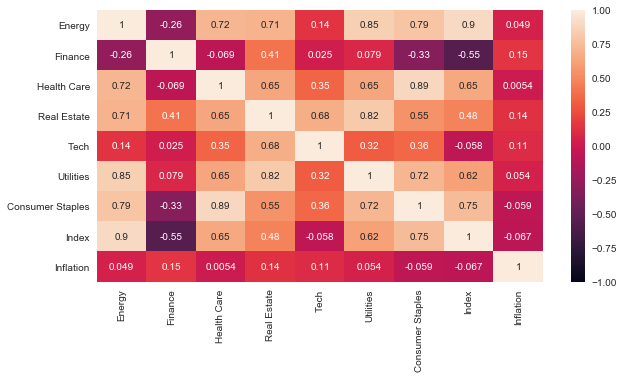

In [319]:
plt.subplots(figsize=(10,5))
sns.heatmap(corr_df_funds, vmin = -1, vmax = 1, annot = True)

### Correlation to CPI
#### Energy: .9
####  Fiance: -.55
#### Health Care: .65
#### Real Estate: .48
#### Tech: -.058
#### Utilities: .62
#### Consumer Staples: .75


In [320]:
funds_inflation_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [321]:
funds_inflation_pct_change.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [322]:
funds_inflation_df = funds_inflation_df.reset_index()

In [323]:
funds_inflation_df.head()

,index,Energy,Finance,Health Care,Real Estate,Tech,Utilities,Consumer Staples,Index,Inflation
0,2000-01-01,27.312500,18.734768,30.109375,NaN,50.56250,27.640625,23.234375,168.8,0.30
1,2000-02-01,26.156250,16.729284,28.140625,NaN,55.87500,24.281250,20.515625,169.8,0.59
2,2000-03-01,29.312500,19.712124,30.671875,NaN,60.56250,26.734375,21.218750,171.2,0.82
3,2000-04-01,28.875000,19.902517,30.312500,NaN,55.00000,28.484375,22.343750,171.3,0.06
4,2000-05-01,32.265625,20.346771,29.500000,NaN,49.28125,28.421875,23.937500,171.5,0.12


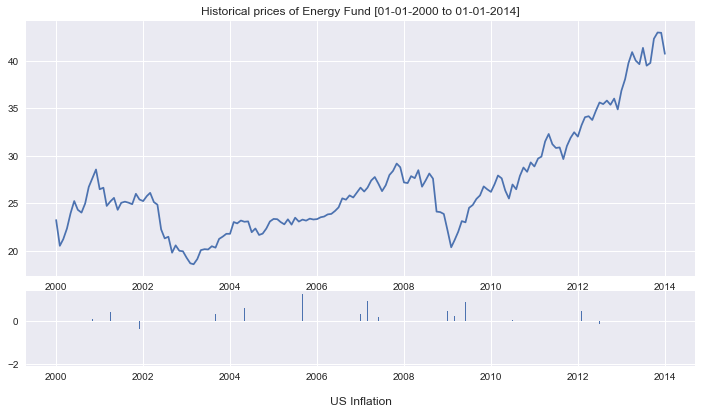

In [325]:
    start_date = pd.to_datetime('2000-01-01')
    end_date = pd.to_datetime('2014-01-01')                         
    funds_inflation_df['index'] = pd.to_datetime(funds_inflation_df['index']) 
    new_df = (funds_inflation_df['index']>= start_date) & (funds_inflation_df['index']<= end_date)
    df1 = funds_inflation_df.loc[new_df]
    stock_data = df1.set_index('index')
    top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
    top_plt.plot(stock_data.index, stock_data["Consumer Staples"])
    plt.title('Historical prices of Energy Fund [01-01-2000 to 01-01-2014]')
    bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
    bottom_plt.bar(stock_data.index, stock_data['Inflation'])
    plt.title('\nUS Inflation', y=-0.60)
    plt.gcf().set_size_inches(12,8)

### SMALL & LARGE CAP CLOSING PRICES VS INFLATION

In [86]:
#pulling in yahoo finance data in small & large cap energy & tech companies

In [76]:
aapl_monthly= get_data("AAPL", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
orcl_monthly= get_data("ORCL", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
dlx_monthly= get_data("DLX", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
epay_monthly= get_data("EPAY", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
xom_monthly= get_data("XOM", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
vlo_monthly= get_data("VLO", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
int_monthly= get_data("INT", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")
cpe_monthly= get_data("CPE", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo")


In [87]:
#combing clsoing prices of companies into dataframe

In [79]:
combined_close = pd.concat([aapl_monthly['close'], orcl_monthly['close'], dlx_monthly['close'], epay_monthly['close'], xom_monthly['close'], vlo_monthly['close'], int_monthly['close'], cpe_monthly['close']], axis = 1)
combined_close.columns = ['AAPL','ORCL','DLX','EPAY','XOM','VLO','INT','CPE']

In [125]:
combined_close.head()

,AAPL,ORCL,DLX,EPAY,XOM,VLO,INT,CPE
2000-01-01,0.926339,24.976562,21.386625,31.4375,41.43750,5.198812,1.718750,120.000
2000-02-01,1.023438,37.125000,18.738281,39.0625,37.65625,5.827239,1.796875,140.000
2000-03-01,1.212612,39.031250,21.186750,36.4375,39.00000,7.012683,1.828125,121.250
2000-04-01,1.107701,39.968750,20.137405,36.0000,38.84375,6.627057,1.765625,135.625
2000-05-01,0.750000,35.937500,19.737656,30.5625,41.65625,6.684186,1.703125,152.500


In [88]:
#importing inflation data and cpi from csv

In [367]:
file_path = Path('cpiai_csv.csv')
inflation_df = pd.read_csv(file_path,parse_dates=True, infer_datetime_format=True, index_col = 'Date'
                          )

In [421]:
file_path_2 = Path('united-states-inflation-rate-cpi.csv')
inflation_rates = pd.read_csv(file_path_2,parse_dates=True, infer_datetime_format=True, index_col = 'date'
                             )

In [422]:
inflation_rates.head()

,Inflation Rate (%),Annual Change
date,,
1960-12-31,1.4580,NaN
1961-12-31,1.0707,-0.39
1962-12-31,1.1988,0.13
1963-12-31,1.2397,0.04
1964-12-31,1.2789,0.04


In [369]:
inflation_df.sample(10)

,Index,Inflation
Date,,
1994-02-01,146.700,0.34
2002-09-01,181.000,0.17
2005-03-01,193.300,0.78
1974-11-01,51.500,0.78
1938-07-01,14.100,0.00
1958-06-01,28.900,0.00
1927-01-01,17.500,-1.13
1973-09-01,45.200,0.22
2007-08-01,207.917,-0.18


In [370]:
#combing dataframes for stocks and inflation

In [371]:
stock_inflation_df = pd.concat([close_price_df, inflation_df], axis=1, join ='inner')
stock_inflation_df
stock_inflation_df.head()

,AAPL,ORCL,DLX,EPAY,XOM,VLO,INT,CPE,Index,Inflation
Date,,,,,,,,,,
2000-01-01,0.926339,24.976562,21.386625,31.4375,41.43750,5.198812,1.718750,120.000,168.8,0.30
2000-02-01,1.023438,37.125000,18.738281,39.0625,37.65625,5.827239,1.796875,140.000,169.8,0.59
2000-03-01,1.212612,39.031250,21.186750,36.4375,39.00000,7.012683,1.828125,121.250,171.2,0.82
2000-04-01,1.107701,39.968750,20.137405,36.0000,38.84375,6.627057,1.765625,135.625,171.3,0.06
2000-05-01,0.750000,35.937500,19.737656,30.5625,41.65625,6.684186,1.703125,152.500,171.5,0.12


In [372]:
stock_inflation_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [373]:
pct_change_df = stock_inflation_df.pct_change()

In [374]:
pct_change_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [375]:
stock_inflation_corr = stock_inflation_df.corr()

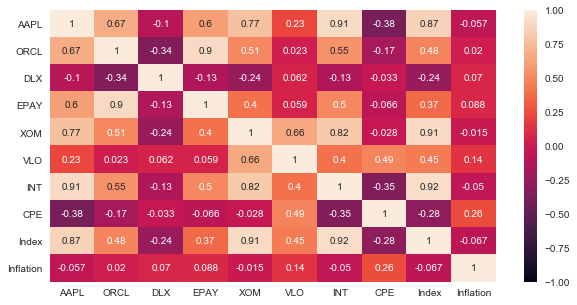

In [376]:
plt.subplots(figsize=(10,5))
sns.heatmap(stock_inflation_corr, vmin = -1, vmax = 1, annot = True)

## Stock Corelations to Inflation
### Large Cap Tech ____________   Large Cap Energy
    AAPL: .87                      XOM: .91
    ORCL: .48                      VLO: .45     
### Small Cap Tech _____________  Small Cap Energy
    DLX: -.24                      INT: .92
    EPAY: .37                      CPE: -.28

### Inflation Rates & Sectors

In [423]:
inflation_rates.reset_index(inplace=True)
inflation_rates.head()

,date,Inflation Rate (%),Annual Change
0,1960-12-31,1.4580,NaN
1,1961-12-31,1.0707,-0.39
2,1962-12-31,1.1988,0.13
3,1963-12-31,1.2397,0.04
4,1964-12-31,1.2789,0.04


In [424]:
inflation_rates['year']= inflation_rates['date'].dt.year
inflation_rates['month']= inflation_rates['date'].dt.month
inflation_rates['day']= inflation_rates['date'].dt.day
inflation_rates.head()

,date,Inflation Rate (%),Annual Change,year,month,day
0,1960-12-31,1.4580,NaN,1960,12,31
1,1961-12-31,1.0707,-0.39,1961,12,31
2,1962-12-31,1.1988,0.13,1962,12,31
3,1963-12-31,1.2397,0.04,1963,12,31
4,1964-12-31,1.2789,0.04,1964,12,31


In [425]:
del inflation_rates['Annual Change']

KeyError: 'Annual Change'

In [426]:
del inflation_rates['month'], inflation_rates['day'], inflation_rates['index']

KeyError: 'index'

In [427]:
inflation_rates = inflation_rates.groupby('year').sum()
inflation_rates.head()

,Inflation Rate (%),Annual Change
year,,
1960,1.4580,0.00
1961,1.0707,-0.39
1962,1.1988,0.13
1963,1.2397,0.04
1964,1.2789,0.04


In [339]:
funds_close.head()

,Energy,Finance,Health Care,Real Estate,Tech,Utilities,Consumer Staples
2000-01-01,27.312500,18.734768,30.109375,NaN,50.56250,27.640625,23.234375
2000-02-01,26.156250,16.729284,28.140625,NaN,55.87500,24.281250,20.515625
2000-03-01,29.312500,19.712124,30.671875,NaN,60.56250,26.734375,21.218750
2000-04-01,28.875000,19.902517,30.312500,NaN,55.00000,28.484375,22.343750
2000-05-01,32.265625,20.346771,29.500000,NaN,49.28125,28.421875,23.937500


In [ ]:
funds_close

In [347]:
funds_percent = funds_close.pct_change()
funds_percent.reset_index(inplace= True)
funds_percent.head()

,index,Energy,Finance,Health Care,Real Estate,Tech,Utilities,Consumer Staples
0,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-02-01,-0.042334,-0.107046,-0.065387,NaN,0.105068,-0.121538,-0.117014
2,2000-03-01,0.120669,0.178300,0.089950,NaN,0.083893,0.101030,0.034273
3,2000-04-01,-0.014925,0.009659,-0.011717,NaN,-0.091847,0.065459,0.053019
4,2000-05-01,0.117424,0.022321,-0.026804,NaN,-0.103977,-0.002194,0.071329


In [348]:
funds_percent['year']= funds_percent['index'].dt.year
funds_percent['month']= funds_percent['index'].dt.month
funds_percent['day']= funds_percent['index'].dt.day

In [404]:
funds_year_sum = funds_percent.groupby('year').sum()

In [405]:
del funds_year_sum['month'], funds_year_sum['day']
funds_year_sum.head()

,Energy,Finance,Health Care,Real Estate,Tech,Utilities,Consumer Staples
year,,,,,,,
2000,0.223615,0.281468,-0.087231,0.000000,-0.399661,0.208502,0.224652
2001,-0.196220,-0.103771,0.016865,0.030891,-0.150703,-0.161332,-0.108541
2002,-0.157573,-0.156849,-0.003839,-0.012265,-0.385987,-0.351124,-0.229703
2003,0.226597,0.259055,0.131992,0.258686,0.332370,0.213144,0.092289
2004,0.287171,0.085988,0.006832,0.249605,0.044203,0.181672,0.062406


In [383]:
yearly_funds_inflation = pd.concat([funds_year_sum, inflation_rates], axis = 1, join = 'inner')
yearly_funds_inflation.head()

,Energy,Finance,Health Care,Real Estate,Tech,Utilities,Consumer Staples,Inflation Rate (%),Annual Change
year,,,,,,,,,
2000,0.223615,0.281468,-0.087231,0.000000,-0.399661,0.208502,0.224652,3.3769,1.19
2001,-0.196220,-0.103771,0.016865,0.030891,-0.150703,-0.161332,-0.108541,2.8262,-0.55
2002,-0.157573,-0.156849,-0.003839,-0.012265,-0.385987,-0.351124,-0.229703,1.5860,-1.24
2003,0.226597,0.259055,0.131992,0.258686,0.332370,0.213144,0.092289,2.2701,0.68
2004,0.287171,0.085988,0.006832,0.249605,0.044203,0.181672,0.062406,2.6772,0.41


In [406]:
yearly_funds_inflation.loc[2017]

Energy                -0.032678
Finance                0.188906
Health Care            0.185637
Real Estate            0.005719
Tech                   0.286223
Utilities              0.089229
Consumer Staples       0.099546
 Inflation Rate (%)    2.130100
 Annual Change         0.870000
Name: 2017, dtype: float64

In [428]:
yearly_funds_inflation.loc[2016].hvplot.bar(rot = 75)

:Bars   [index]   (2016)

In [399]:
corr_x = yearly_funds_inflation.corr()

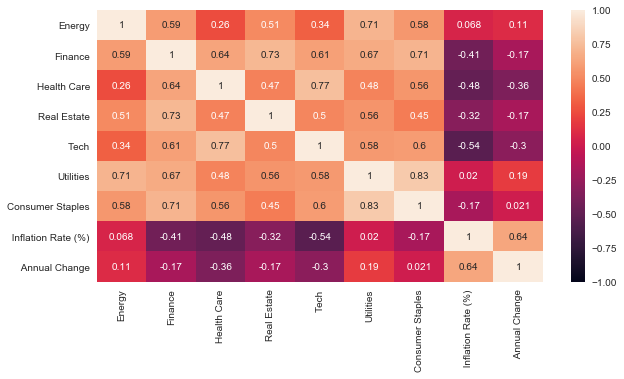

In [401]:
plt.subplots(figsize=(10,5))
sns.heatmap(corr_x, vmin = -1, vmax = 1, annot = True)

### Fundamental Analysis

In [212]:
quote_table = si.get_quote_table("aapl", start_date="1/01/2000", end_date="07/01/2021", index_as_date = True, interval="1mo", dict_result=False)
quote_table

TypeError: get_quote_table() got an unexpected keyword argument 'start_date'

In [329]:
si.get_stats_valuation("aapl")

,Unnamed: 0,As of Date: 7/21/2021Current,3/31/2021,12/31/2020,9/30/2020,6/30/2020
0,Market Cap (intraday) 5,2.44T,2.04T,2.23T,1.97T,1.56T
1,Enterprise Value 3,2.49T,2.07T,2.25T,1.99T,1.58T
2,Trailing P/E,32.70,32.92,40.45,35.12,28.52
3,Forward P/E 1,27.47,28.49,33.44,30.12,24.33
4,PEG Ratio (5 yr expected) 1,2.26,2.71,3.33,2.86,2.02
5,Price/Sales (ttm),7.72,7.21,8.47,7.50,6.12
6,Price/Book (mrq),35.26,30.78,34.16,27.20,19.93
7,Enterprise Value/Revenue 3,7.65,23.15,20.22,30.69,26.44
8,Enterprise Value/EBITDA 7,24.14,65.87,61.11,108.89,95.15


In [333]:
si.get_cash_flow('orcl')

endDate,2021-05-31,2020-05-31,2019-05-31,2018-05-31
Breakdown,,,,
investments,-10922000000,11531000000,28580000000,-2165000000
changeToLiabilities,382000000,-718000000,204000000,-24000000
totalCashflowsFromInvestingActivities,-13098000000,9843000000,26557000000,-5625000000
netBorrowings,12303000000,15388000000,-4500000000,2643000000
totalCashFromFinancingActivities,-10378000000,-6132000000,-42056000000,-9982000000
changeToOperatingActivities,622000000,665000000,261000000,-258000000
issuanceOfStock,1786000000,1588000000,2155000000,2402000000
netIncome,13746000000,10135000000,11083000000,3587000000
changeInCash,-7141000000,16725000000,-1106000000,-164000000


In [241]:
si.get_income_statement("cpe").transpose()

Breakdown,researchDevelopment,effectOfAccountingCharges,incomeBeforeTax,minorityInterest,netIncome,sellingGeneralAdministrative,grossProfit,ebit,operatingIncome,otherOperatingExpenses,...,nonRecurring,otherItems,incomeTaxExpense,totalRevenue,totalOperatingExpenses,costOfRevenue,totalOtherIncomeExpenseNet,discontinuedOperations,netIncomeFromContinuingOps,netIncomeApplicableToCommonShares
endDate,,,,,,,,,,,,,,,,,,,,,
2020-12-31,None,None,-2411567000,None,-2533621000,37187000,647333000,91098000,91098000,38417000,...,None,None,122054000,1033147000,942049000,385814000,-2502665000,None,-2533621000,-2533621000
2019-12-31,None,None,103229000,None,67928000,45331000,537094000,184912000,184912000,66209000,...,None,None,35301000,671572000,486660000,134478000,-81683000,None,67928000,55627000
2018-12-31,None,None,308470000,None,300360000,35293000,482689000,308074000,308074000,-43461000,...,None,None,8110000,587624000,279550000,104935000,-4687000,None,300360000,293065000
2017-12-31,None,None,121697000,None,120424000,27067000,294171000,122545000,122545000,21817000,...,None,None,1273000,344078000,221533000,49907000,-4289000,None,120424000,113129000


In [264]:
from polygon import RESTClient


def main():
    key = "mRC0wpWu_28T0pCfpumTcjHSUurDPu3p"

    # RESTClient can be used as a context manager to facilitate closing the underlying http session
    # https://requests.readthedocs.io/en/master/user/advanced/#session-objects
    with RESTClient(key) as client:
        resp = client.stocks_equities_daily_open_close("AAPL", "2021-06-11")
        print(f"On: {resp.from_} Apple opened at {resp.open} and closed at {resp.close}")


if __name__ == '__main__':
    main()

On: 2021-06-11 Apple opened at 126.53 and closed at 127.35
